## 1) Data Quality

### Model 2: campaign response from transaction data (Annual features)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
annual_feature_outputs = pd.read_excel('annual_feature_outputs.xlsx')

In [3]:
annual_feature_outputs.shape

(6884, 78)

In [4]:
X2 = annual_feature_outputs.drop(['response','customer_id'],axis=1)
y2 = annual_feature_outputs['response']

In [5]:
y2.value_counts()

0    6237
1     647
Name: response, dtype: int64

In [6]:
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X2, y2, test_size=2/3, random_state=1147)
X_test_annual.shape

(4590, 76)

In [7]:
best_RF = RandomForestClassifier(n_estimators=25, max_depth=8, random_state=1148)

In [8]:
best_RF.fit(X_train_annual, y_train_annual)

RandomForestClassifier(max_depth=8, n_estimators=25, random_state=1148)

In [9]:
Train_Error_RF = best_RF.score(X_train_annual, y_train_annual)
print('Train Mean Accuracy:', round(Train_Error_RF,2))

Train Mean Accuracy: 0.94


In [10]:
Test_Error_RF = best_RF.score(X_test_annual, y_test_annual)
print('Test Mean Accuracy:', round(Test_Error_RF,2))

Test Mean Accuracy: 0.9


The model does not overfit since training and test accuracy does not differ much

In [11]:
m = best_RF.feature_importances_
m

array([0.02111522, 0.0154174 , 0.01368346, 0.0142308 , 0.01759092,
       0.02198845, 0.02165   , 0.01260755, 0.02524932, 0.03310669,
       0.00920063, 0.02184858, 0.01381356, 0.01972818, 0.01725891,
       0.01582353, 0.01424398, 0.0182593 , 0.01862307, 0.02273788,
       0.00653178, 0.01883112, 0.01885751, 0.01459524, 0.01456663,
       0.00865782, 0.02156197, 0.01829602, 0.05108929, 0.05646418,
       0.01441379, 0.02090799, 0.02496033, 0.01821182, 0.01797394,
       0.00514876, 0.00681979, 0.01195574, 0.02461415, 0.05999276,
       0.01016457, 0.00872918, 0.01011808, 0.00490141, 0.00462566,
       0.00287734, 0.00387401, 0.00584411, 0.00444234, 0.00296273,
       0.00266987, 0.00312217, 0.00242134, 0.00667844, 0.0055601 ,
       0.00555402, 0.00407201, 0.00633605, 0.00868315, 0.00773558,
       0.00490117, 0.00788543, 0.00958262, 0.00802824, 0.00620725,
       0.0090858 , 0.00635283, 0.00437949, 0.01666041, 0.0017262 ,
       0.00166314, 0.00034865, 0.00151382, 0.00394977, 0.00202

In [12]:
m.size

76

In [13]:
cnt = []
for column_name in X_train_annual.columns:
    column = X_train_annual[column_name]
    cnt.append(np.count_nonzero(column) / column.size * 100)  

In [14]:
cnt = np.array(cnt)
cnt

array([99.95640802, 94.02789887, 99.1717524 , 98.38709677, 98.73583261,
       61.76983435, 94.02789887, 99.1717524 , 98.38709677, 98.73583261,
       61.76983435, 94.02789887, 99.1717524 , 98.38709677, 98.73583261,
       61.76983435, 77.24498692, 93.72275501, 93.24324324, 95.2048823 ,
       25.4141238 , 77.24498692, 93.72275501, 93.24324324, 95.2048823 ,
       25.4141238 , 94.02789887, 99.1717524 , 98.38709677, 98.73583261,
       61.76983435, 77.24498692, 93.72275501, 93.24324324, 95.2048823 ,
       25.4141238 , 94.02789887, 99.1717524 , 98.38709677, 98.73583261,
       61.76983435, 35.57105493, 33.60941587, 33.9581517 , 33.39145597,
       35.26591107, 34.35047951, 35.91979076, 46.29468178, 48.82301656,
       48.38709677, 47.77680907, 47.60244115, 49.25893636, 49.34612031,
       50.26155187, 48.16913688, 50.87183958, 47.21011334, 49.04097646,
       50.17436792, 48.16913688, 46.73060157, 49.21534438, 46.90496949,
       49.56408021, 49.91281604, 50.        , 51.96163906, 13.81

In [15]:
cnt.size

76

Plot Feature importance vs Completeness

Text(0.5, 1.0, 'Semi-log plot')

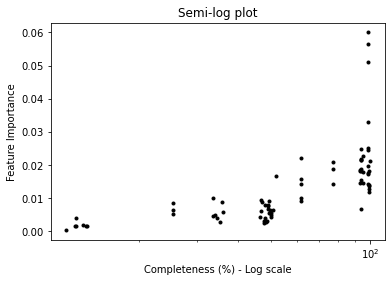

In [16]:
plt.plot(cnt, m, '.', color='black')
plt.xscale("log")
plt.xlabel("Completeness (%) - Log scale")
plt.ylabel("Feature Importance")
plt.title("Semi-log plot")

In Random Forests, every feature importance is a positive value which indicates that all the features are essential for the model to make the right decision.<br>
From the above graph we can infer that there is a strong correlation between feature importance and completeness.<br>
Features with completeness greater than 50% contribute at higher value of feature importance.<br>
Features with completeness less than 15% has zero or very low feature importance.